Step 1: use our “titanic” dataset in homework #3, and split data in the same way you did in
homework #3 – 80% as training and 20% test sets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Titanic.csv', index_col=0)

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [4]:
numerical_column= ["survived","age", "sibsp"]
categorical_column= ["pclass", "sex"]

In [5]:
#replace null values with mean
for column_name in ["age","sibsp"]:
    df[column_name].fillna(int(df[column_name].mean()), inplace=True)

In [6]:
df[categorical_column].mode()
#checks if they are all categorical variables

,pclass,sex
0,3rd,male


In [7]:
#replace null values with mean
for column_name in ["pclass","sex"]:
    #fill most common values
    df[column_name].fillna(df[column_name].mode(), inplace=True)
    #binaries categorical values
    encoded_columns= pd.get_dummies(df[column_name],prefix= column_name)
    #concat to existing dataframe
    df=pd.concat([df,encoded_columns],axis=1)
    #delete, axis=1, column of dataframe
    df.drop(column_name, axis=1, inplace=True)

In [8]:
#training and testing
X=df[["age", "sibsp", "sex_female","sex_male", "pclass_1st","pclass_2nd","pclass_3rd"]]
y=df[["survived"]]
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.2, random_state=42)

Step 2: Fit a neural network using independent variables ‘pclass + sex + age + sibsp’ and
dependent variable ‘survived’. Fill in n/a attributes with the average of the same attributes
from other training examples. Use 2 hidden layers and set the activation functions for both the
hidden and output layer to be the sigmoid function. Set “solver” parameter as either SGD
(stochastic gradient descend) or Adam (similar to SGD but optimized performance with mini
batches). You can adjust parameter “alpha” for regularization (to control overfitting) and other
parameters such as “learning rate” and “momentum” as needed.

In [31]:
from sklearn.neural_network import MLPClassifier
#logisitic=sigmoid
clf = MLPClassifier(solver='adam', alpha=1e-7,
                    hidden_layer_sizes=(5, 3),activation='logistic',max_iter=280, random_state=1)
clf.fit(X_train, y_train)
#second one change hidden layer sizes, instead 50,2, 50 nodes
#make function for step 4 


/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=1e-07, hidden_layer_sizes=(5, 3),
              max_iter=280, random_state=1)

In [39]:
# Step 4 
#make a function cell 10 through 14 
predictions = clf.predict(X_test)


In [46]:

y_test["predictions"]= predictions
#y_test["predictions"]= np.round(predictions[:,1],1)


<AxesSubplot:xlabel='predictions'>

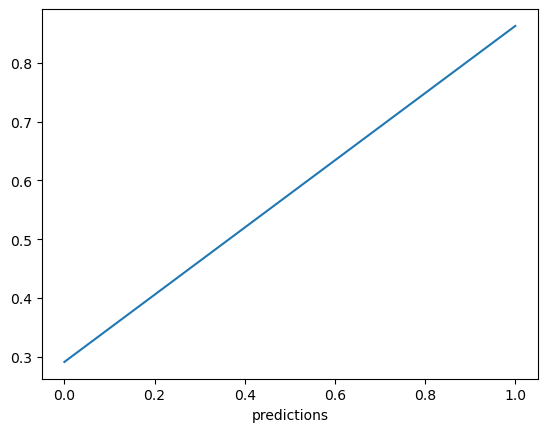

In [41]:
y_test.groupby("predictions")["survived"].mean().plot()
#sigmoid function is the same as probability function as an output classifier
#lots of false positive that they may or may not survive
#the lower the predicted the probablity the lower the probability the person survived

In [42]:
#only give me survivors, and how often was I right
survivors = y_test[y_test["survived"]==1]
fatalities = y_test[y_test["survived"]==0]

In [43]:
#how often is survived=predictions, accuracy score 197 times 
(survivors["survived"]==survivors["predictions"]).value_counts()/ len(survivors)

True     0.533898
False    0.466102
dtype: float64

In [44]:
(fatalities["survived"]==fatalities["predictions"]).value_counts()/ len(fatalities)

True     0.930556
False    0.069444
dtype: float64

Step 3:Check the performance of the model with out-of- sample accuracy, defined as
out-of-sample percent survivors correctly predicted (on test set)
out-of-sample percent fatalities correctly predicted (on test set)

I have also done the accuracy like it was done on last assignment, but also wanted to do it as intended via confusion matrix


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
predictions_new = clf.predict(X_train)
y_train["predictions"]= predictions

#Traning Set
conf_matrix = confusion_matrix(y_train, predictions_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
survivor_train = TP/(TP+FN)
fatalities_train = TN/(FP+TN)

#for testing set
conf_matrix = confusion_matrix(y_test, predictions_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
survivor_test = TP/(TP+FN)
fatalities_test = TN/(FP+TN)

print("in‐sample survivors correctly predicted(Train) : {0:.2f}%\n".format(survivor_train*100))
print("in‐sample fatalities predicted(Train)  : {0:.2f}%\n".format(fatalities_train*100))
print("out‐of‐sample Survivors predicted (Test) : {0:.2f}%\n".format(survivor_test*100))
print("out-of‐sample Fatalitities predicted (Test) : {0:.2f}%\n".format(fatalities_test*100))


ValueError: Length of values (262) does not match length of index (1047)

Step 4:Compare the out-of-sample accuracy (as defined in step 3) with the random forest
obtained in homework #3. (You can either use a table or plot the results of the two algorithms
in one figure). Explain any difference in accuracy


In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#random_state=0, random generator starts at 0
clf = RandomForestClassifier(n_estimators =50,max_leaf_nodes = 15, random_state=0)
clf.fit(X_train, y_train)
#find out if it is doing accurate predictions
y_pred = clf.predict(X_test)


/var/folders/hr/3dhbmnc50n7csq4c8dgqc60r0000gn/T/ipykernel_36439/434399015.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [17]:
#check the accuracy
y_test["predictions"]= y_pred
y_test
#only give me survivors, and how often was I right
survivors = y_test[y_test["survived"]==1]
fatalities = y_test[y_test["survived"]==0]

#print("Accuracy: ", accuracy)

In [18]:
#how often is survived=predictions, accuracy score 197 times 
(survivors["survived"]==survivors["predictions"]).value_counts()/ len(survivors)

True     0.567797
False    0.432203
dtype: float64

In [19]:
(fatalities["survived"]==fatalities["predictions"]).value_counts()/ len(fatalities)

True     0.909722
False    0.090278
dtype: float64


Please try two different network structures (i.e., number of neurons at each hidden layer) and show their respective accuracy.
Hidden Layer of 50

In [20]:
clf = MLPClassifier(solver='adam', alpha=1e-7,
                    hidden_layer_sizes=(50, 3),activation='logistic',max_iter=280, random_state=1)
clf.fit(X_train, y_train)

/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=1e-07, hidden_layer_sizes=(50, 3),
              max_iter=280, random_state=1)

In [21]:
predictions = clf.predict(X_test)
y_test["predictions"]= predictions
#y_test["predictions"]= np.round(predictions[:,1],1)

In [22]:
#how often is survived=predictions, accuracy score 197 times 
(survivors["survived"]==survivors["predictions"]).value_counts()/ len(survivors)

True     0.567797
False    0.432203
dtype: float64

In [23]:
(fatalities["survived"]==fatalities["predictions"]).value_counts()/ len(fatalities)

True     0.909722
False    0.090278
dtype: float64